In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from scipy import sparse
import matplotlib.animation as animation
from .. import models 
from .. import utils

In [2]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)

#### Replicate results from GH using 3 neurons

In [3]:
num_neurons = 3
E_matrix,seed = create_matrix('electrical',num_neurons)
C_matrix, seed = create_matrix('chemical',num_neurons)
Isyn = 0.05 #delta peak of the chemical synapse


HH

In [4]:
params_HH = load_HH()
k = 0.012 #strength of the gap junction coupling
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2

#Initial conditions of the HH model important quantities
V0 = np.ones(num_neurons) * (-70)
n0 =np.ones(num_neurons)*0.2
m0 = np.ones(num_neurons)*0.1
h0 = np.ones(num_neurons)*0.6 

#time constants
dt = 0.01
t_final = 300

In [5]:
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

data_HH_new = rk_HH(dt,t_final,order,V0,n0,m0,h0,*params_HH,I1,Isyn,k,tau,E_matrix,C_matrix)

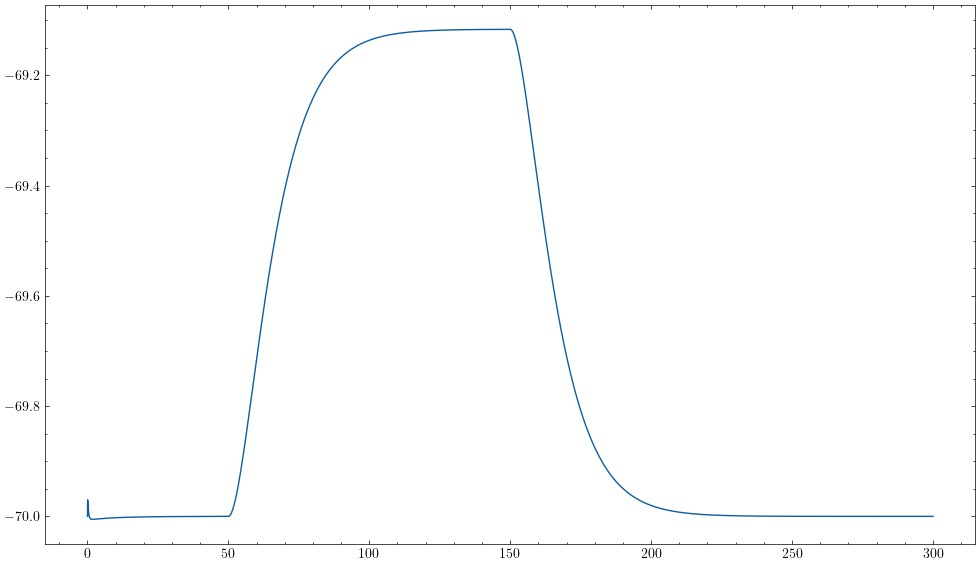

In [6]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_HH_new[:,2])

LIF

In [7]:
params_LIF = load_LIF()
#Same as before
k = 0.012
tau = 1

#filtering order
order = 2

#Initial conditions for the LIF
y0 = np.ones(num_neurons) * (-70)
#Time conditions
t_final = 300
dt = 0.01 

#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

In [8]:
data_IF_new, completeIF_11 = rk_if_2(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1,E_matrix,C_matrix)

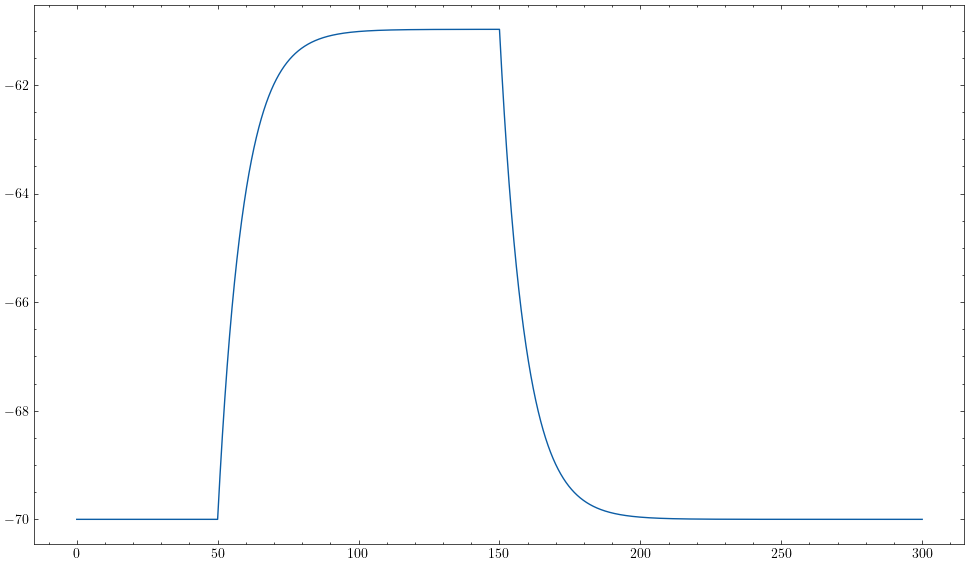

In [9]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_IF_new[:,0])

IZH

In [10]:
params_IZH = load_ISH()

k_izh = 0.04
dt = 0.01
t_final = 300
tau = 1

I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5
order = 2
y0 = np.ones(num_neurons) * (-70)
u0 = np.zeros(num_neurons)
data_ISH_new, completeISH_11 = rk_ish_2(dt,t_final,order,y0,u0,I1,Isyn,*params_IZH,k_izh,tau,E_matrix,C_matrix)#data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau,E_matrix,C_matrix)

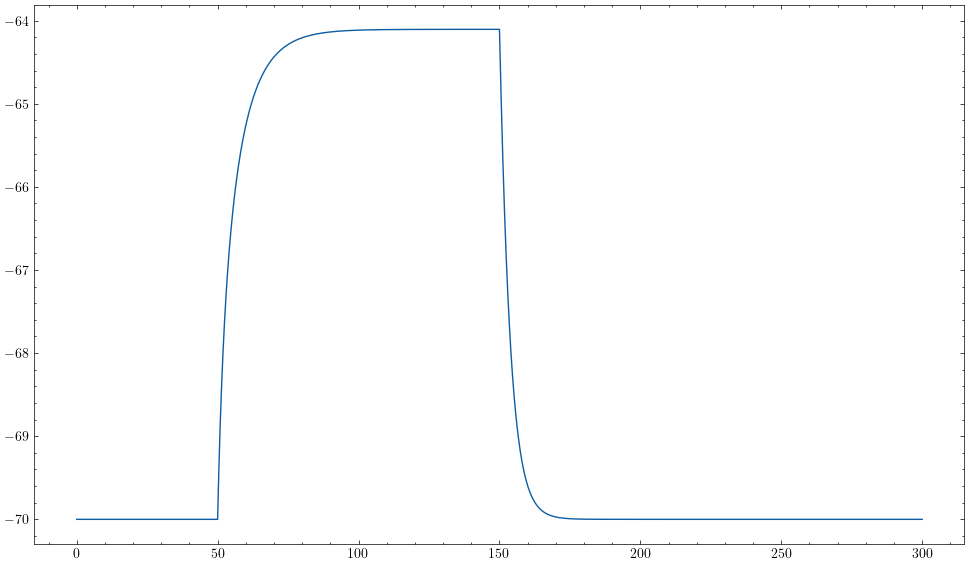

In [11]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ISH_new[:,0])

ML

In [19]:
params_ML = load_ML()

k_ML = 0.008
dt = 0.01
t_final = 300
tau = 1

I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] = 0.5
    I2[i,0] = -0.5
order = 2
y0 = np.ones(num_neurons)*(-71.7061740390072)
w0 = np.ones(num_neurons) * (0.0007223855976593603)
data_ML_new = rk_ml_2(dt,t_final,order,y0,w0,*params_ML,I1,Isyn,k_ML,tau,E_matrix,C_matrix)#data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau,E_matrix,C_matrix)

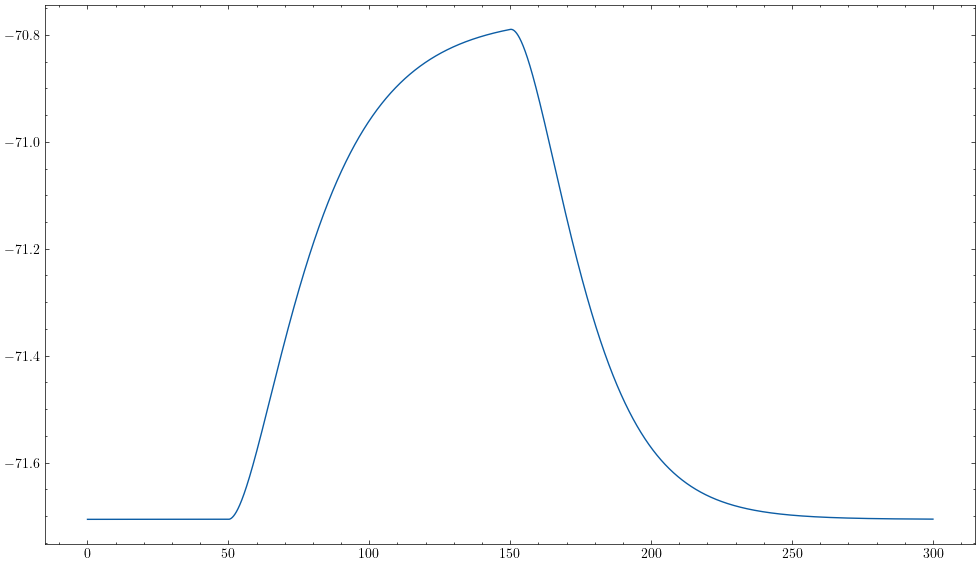

In [22]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ML_new[:,2])

#### Spikes with 3 neurons

HH

In [23]:
tau = 0.3
V0 = np.ones(num_neurons)*(-60)
n0 = np.ones(num_neurons)*0.2 
m0 = np.ones(num_neurons)*0.1 
h0 = np.ones(num_neurons)*0.6 
dt = 0.01
t_final =200 
order = 5

I = np.zeros((int(t_final/dt), num_neurons))

x1 = np.random.normal(0,5,int(t_final/dt))
x2 = np.random.normal(0,5,int(t_final/dt))

I[:,0] = 2.0 + 5 *x1 
I[:,1] = 1.5 + 5*x2 
I[:,2] = 1.0 + 5*x2 

Isyn = 0.05
data_HH_new_6 = rk_HH(dt,t_final,order,V0,n0,m0,h0,*params_HH,I,Isyn,k,tau,E_matrix,C_matrix)

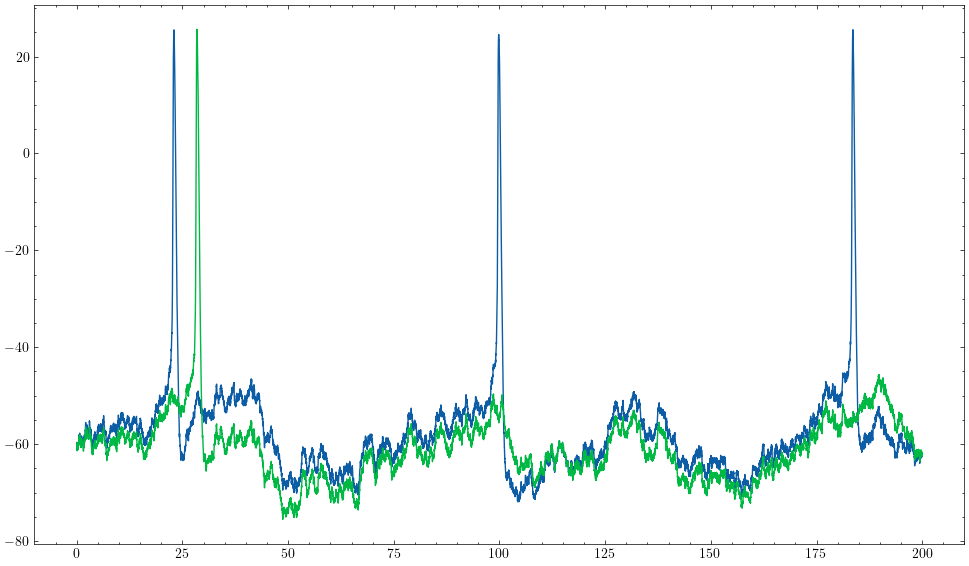

In [24]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_HH_new_6[:,1])
plt.plot(t,data_HH_new_6[:,2])

LIF

In [25]:
tau = 0.65
y0 = np.ones(num_neurons)*(-60)
dt = 0.01
t_final = 200

Isyn = 0.05
data_IF_new_2, completeIF_11_2 = rk_if_2(dt,t_final,order,y0,*params_LIF,I,Isyn,k,tau,1,E_matrix,C_matrix)

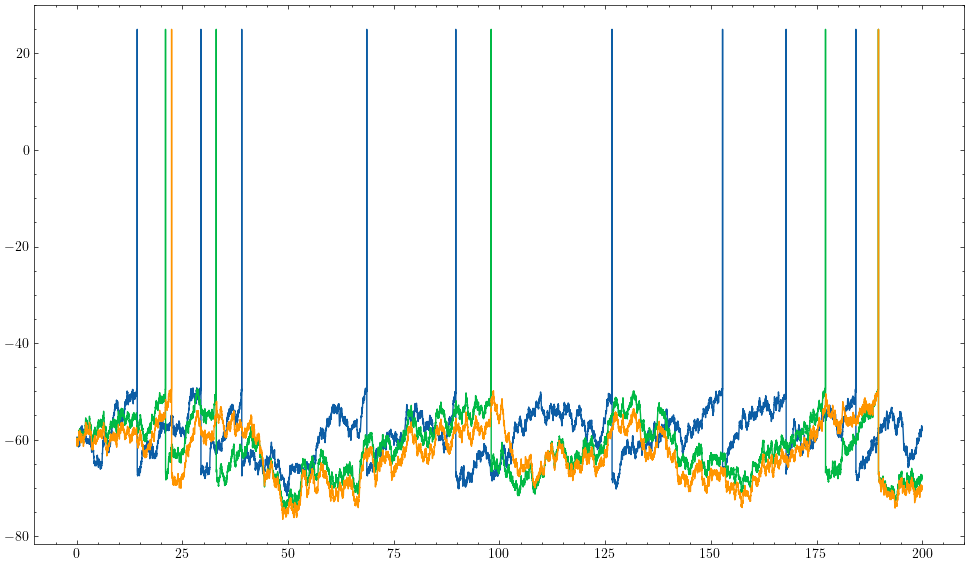

In [26]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_IF_new_2[:,0])
plt.plot(t,data_IF_new_2[:,1])
plt.plot(t,data_IF_new_2[:,2])

IZH

In [27]:
y0 = np.ones(num_neurons) * (-70)
u0 = np.zeros(num_neurons)
data_ISH_new_2, completeISH_11_2 = rk_ish_2(dt,t_final,order,y0,u0,I,Isyn,*params_IZH,k_izh,tau,E_matrix,C_matrix)#data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau,E_matrix,C_matrix)

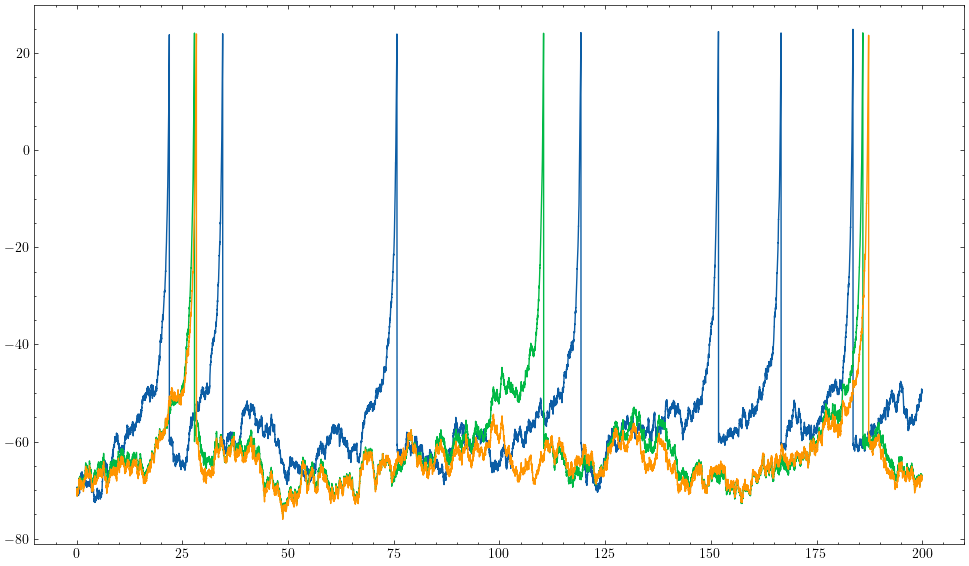

In [28]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ISH_new_2[:,0])
plt.plot(t,data_ISH_new_2[:,1])
plt.plot(t,data_ISH_new_2[:,2])

ML

In [31]:
y0 = np.ones(num_neurons)*(-71.7061740390072)
w0 = np.ones(num_neurons) * (0.0007223855976593603)
data_ML_new_2 = rk_ml_2(dt,t_final,order,y0,w0,*params_ML,I,Isyn,k_ML,tau,E_matrix,C_matrix)#data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau,E_matrix,C_matrix)

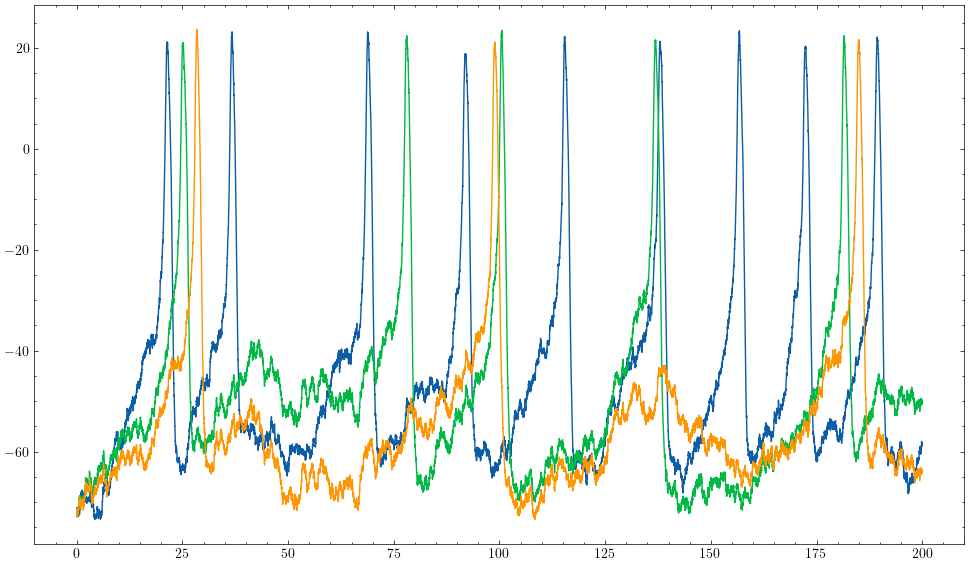

In [32]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ML_new_2[:,0])
plt.plot(t,data_ML_new_2[:,1])
plt.plot(t,data_ML_new_2[:,2])